 **Solving one dimensional Burger's equation by using Rk4 method**

At the time step 0, 
 u = [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16]
At the time step 1, 
 u = [-0.0019762   0.32740777  0.61894473  0.84130486  0.96716994  0.97855367
  0.87013618  0.65173824  0.34884898 -0.00223436]
At the time step 2, 
 u = [-0.00373106  0.31395544  0.59669774  0.81748371  0.94920562  0.97117085
  0.8731857   0.66015251  0.35555262 -0.00491351]
At the time step 3, 
 u = [-0.00529852  0.30152843  0.57591024  0.79458627  0.93106654  0.96277087
  0.87517264  0.667973    0.36209338 -0.00809554]
At the time step 4, 
 u = [-0.00670599  0.29001166  0.5564564   0.77261781  0.91288374  0.953468
  0.87610771  0.67514552  0.36843206 -0.01184422]
At the time step 5, 
 u = [-0.00797573  0.2793065   0.53822108  0.75156902  0.89476827  0.9433764
  0.87601275  0.68161965  0.37452806 -0.01622966]
At the time step 6, 
 u = [-0.00912602  0.26932805  0.52109958  0.73141984  0.

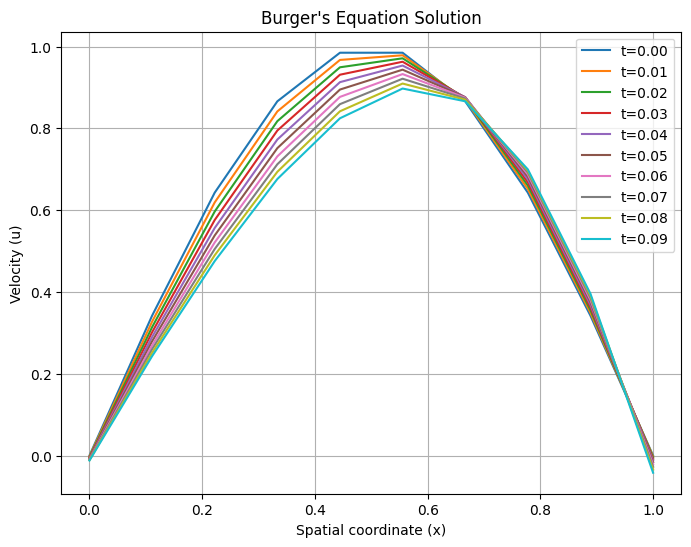

In [6]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nu = 0.1  # Diffusion coefficient or Kinematic viscosity
dt = 0.01  # Time step
dx = 0.1  # Spatial step
t_end = 0.1  # End time
x_end = 1.0  # End spatial coordinate

# Number of grid points
nt = int(t_end / dt)  # Number of time steps
nx = int(x_end / dx)  # Number of spatial points

# Initialize velocity field u
u = np.zeros((nt, nx))  # Create a 2D array to hold velocity values, initialized to zero
u[0, :] = np.sin(np.pi * np.arange(nx) / (nx - 1))  # Initial condition for velocity field
print(f"At the time step 0, \n u = {u[0, :]}")  # Printing initial velocity field

# Define 1st order space derivative
def space_deriv1(u, dx):
    return np.gradient(u, dx)  # Calculating first derivative using numpy's gradient function

# Define 2nd order space derivative
def space_deriv2(u, dx):
    return np.gradient(np.gradient(u, dx), dx)  # Calculating second derivative using numpy's gradient function

# RK4 method for Burger's equation
for t in range(1, nt):
    # Calculating k1 term in RK4 method
    k1 = dt * (-u[t - 1, :] * space_deriv1(u[t - 1, :], dx) + nu * space_deriv2(u[t - 1, :], dx))

    # Calculating k2 term in RK4 method
    k2 = dt * (-u[t - 1, :] * space_deriv1(u[t - 1, :] + 0.5 * k1, dx) + nu * space_deriv2(u[t - 1, :] + 0.5 * k1, dx))

    # Calculating k3 term in RK4 method
    k3 = dt * (-u[t - 1, :] * space_deriv1(u[t - 1, :] + 0.5 * k2, dx) + nu * space_deriv2(u[t - 1, :] + 0.5 * k2, dx))
    # Calculating k4 term in RK4 method

    k4 = dt * (-u[t - 1, :] * space_deriv1(u[t - 1, :] + k3, dx) + nu * space_deriv2(u[t - 1, :] + k3, dx))

    # Update velocity field using RK4 method
    u[t, :] = u[t - 1, :] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Printing the velocity field at current time step
    print(f"At the time step {t}, \n u = {u[t, :]}")

# Plotting
plt.figure(figsize=(8, 6))  # Creating a new figure with

# Plot velocity field for each time step
for i in range(nt):
    plt.plot(np.linspace(0, x_end, nx), u[i, :], label=f"t={i * dt:.2f}")

plt.xlabel('Spatial coordinate (x)')  # Setting of x-axis label
plt.ylabel('Velocity (u)')  # Setting of y-axis label
plt.title("Burger's Equation Solution")  # Setting of plot title
plt.legend()  # Show legend
plt.grid(True)  # Enable grid
plt.show()  # Display the plot
